In [1]:
import pandas as pd

df=pd.read_csv('https://labfile.oss.aliyuncs.com/courses/3023/American_environment_data.csv')
df.head()

,State,Year,Month,Avg Daily Sunlight (kJ/m2),Avg Daily Max Air Temperature (F),Avg Daily Max Heat Index (F),Avg Daily Precipitation (mm),Avg Day Land Surface Temperature (F),Region
0,Alabama,1979,1,8797.02,46.95,NaN,6.02,NaN,South
1,Alabama,1980,1,8660.60,55.51,NaN,4.59,NaN,South
2,Alabama,1981,1,11018.25,49.59,NaN,1.15,NaN,South
3,Alabama,1982,1,9825.44,52.95,82.1,5.21,NaN,South
4,Alabama,1983,1,9515.62,51.33,NaN,3.46,NaN,South


In [2]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['legend.frameon']=False

### Difference in climate

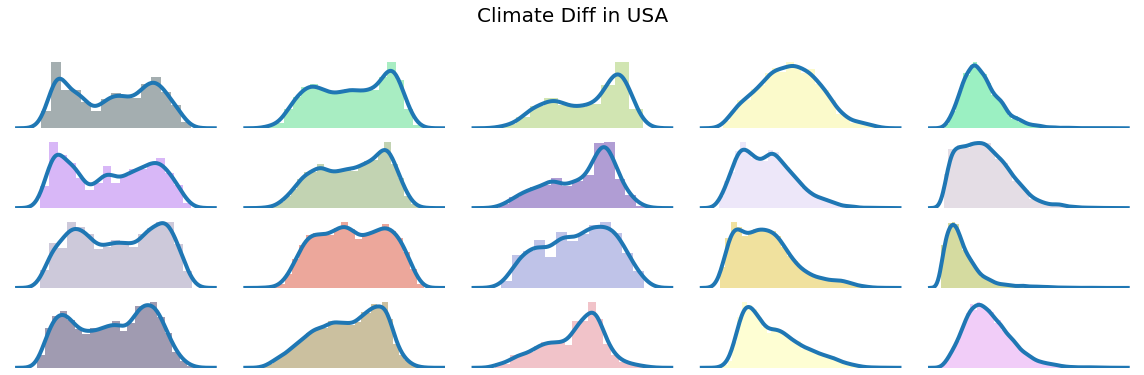

In [3]:
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

np.random.seed(121)
data=df.copy()
regions=[' Northeast',' Midwest',' West',' South']
cols=['Avg Daily Sunlight (kJ/m2)',
        'Avg Daily Max Air Temperature (F)',
        'Avg Day Land Surface Temperature (F)',
        'Avg Daily Max Heat Index (F)',
        'Avg Daily Precipitation (mm)']

fig,axs=plt.subplots(len(regions),len(cols),figsize=(16,5))
for i,region in enumerate(regions):
    for j,col in enumerate(cols):
        ax=axs[i,j]
        ax.set_xticks([])
        ax.set_yticks([])
        for pos in ['left','right','top','bottom']:
            ax.spines[pos].set_visible(False)
        color=list(np.random.random(size=(1,3))[0])
        sns.distplot(data.loc[data['Region']==region,col],ax=ax,color=color,kde_kws=(dict(lw=4,color='tab:blue')))
        if i==len(np.unique(data['Region']))-1:
            ax.set_xlabel(col.split('(')[0],fontsize=14)
        else:
            ax.set_xlabel('')
            ax.set_xticks([])
        if j==0:
            ax.set_ylabel(region,fontsize=16)
        else:
            ax.set_ylabel('')
fig.suptitle('Climate Diff in USA',va='bottom',size=20)
plt.tight_layout()

### Precipitation

Text(0.5, 1.0, 'Avg Daily Precipitation by Month USA')

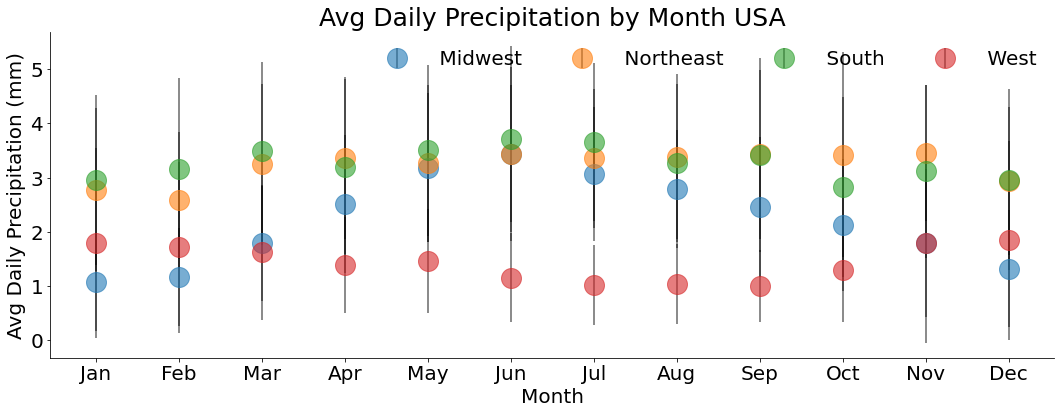

In [4]:
fontsize=20
plt.rcParams['xtick.labelsize']=fontsize
plt.rcParams['ytick.labelsize']=fontsize
plt.rcParams['axes.labelsize']=fontsize
plt.rcParams['axes.titlesize']=fontsize
plt.rcParams['legend.fontsize']=fontsize
plt.rcParams['axes.spines.right']=False
plt.rcParams['axes.spines.top']=False
plt.rcParams['figure.figsize']=(18, 6)

months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

import matplotlib.colors as cs

colors=[value for value in cs.TABLEAU_COLORS.values()]
for i,region in enumerate(np.unique(df['Region'])):
    data=df.loc[df['Region']==region]
    mean_data=data.groupby(['Month'],as_index=False).mean()
    std_data=data.groupby(['Month'],as_index=False).std()
    plt.errorbar(x=mean_data['Month'],y=mean_data['Avg Daily Precipitation (mm)'],yerr=std_data['Avg Daily Precipitation (mm)'],
                fmt='o',ecolor='k',markersize=20,alpha=.6,label=region,markerfacecolor=colors[i])
plt.xticks(ticks=np.arange(1,13),labels=months)
plt.legend(ncol=4)
plt.xlabel('Month')
plt.ylabel('Avg Daily Precipitation (mm)')
plt.title('Avg Daily Precipitation by Month USA',size=25)

### temperature change in daily basis

Text(0.5, 1.0, 'Avg Daily Max Air Temperature by Year USA')

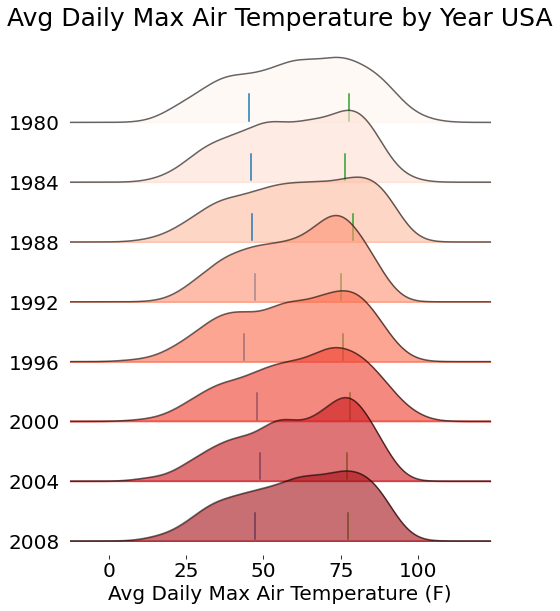

In [5]:
import joypy
plt.rcParams['figure.figsize']=(7,8)
years=np.arange(1980,2011,4)
data=pd.DataFrame([])
for year in years:
    data=pd.concat([data,df.loc[df['Year']==year]])
fig,axs=joypy.joyplot(data,column=['Avg Daily Max Air Temperature (F)'],xlabelsize=20,colormap=plt.cm.Reds,alpha=.6,ylabelsize=20,by='Year')
for i,year in enumerate(years):
    ax=axs[i]
    agg_df=data.loc[data['Year']==year,'Avg Daily Max Air Temperature (F)']
    colors=['tab:blue','tab:green']
    for j,p_value in enumerate([25,75]):
        ax.axvline(np.percentile(agg_df,p_value),ymax=.4,ymin=.15,color=colors[j])
plt.xlabel('Avg Daily Max Air Temperature (F)')
plt.title('Avg Daily Max Air Temperature by Year USA',size=25)

### precipitation in daily basis

Text(0.5, 1.0, 'Avg Daily Precipitation by Year USA')

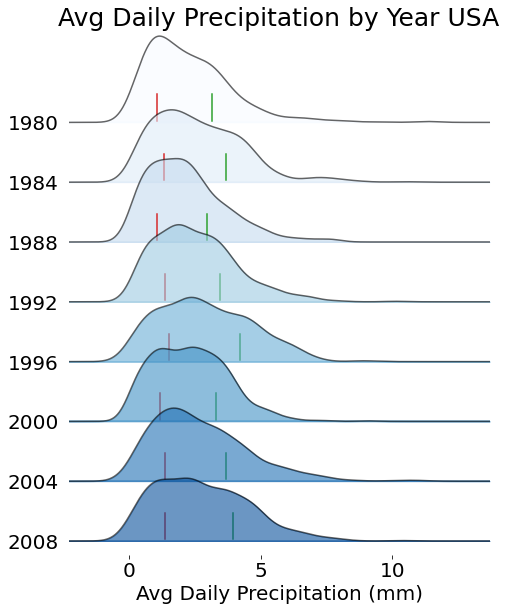

In [6]:
plt.rcParams['figure.figsize']=(7,8)
years=np.arange(1980,2011,4)
data=pd.DataFrame([])
for year in years:
    data=pd.concat([data,df.loc[df['Year']==year]])
fig,axs=joypy.joyplot(data,column=['Avg Daily Precipitation (mm)'],xlabelsize=20,colormap=plt.cm.Blues,alpha=.6,ylabelsize=20,by='Year')
for i,year in enumerate(years):
    ax=axs[i]
    agg_df=data.loc[data['Year']==year,'Avg Daily Precipitation (mm)']
    colors=['tab:red','tab:green']
    for j,p_value in enumerate([25,75]):
        ax.axvline(np.percentile(agg_df,p_value),ymax=.4,ymin=.15,color=colors[j])
plt.xlabel('Avg Daily Precipitation (mm)')
plt.title('Avg Daily Precipitation by Year USA',size=25)

### Precipitation in NY/CA

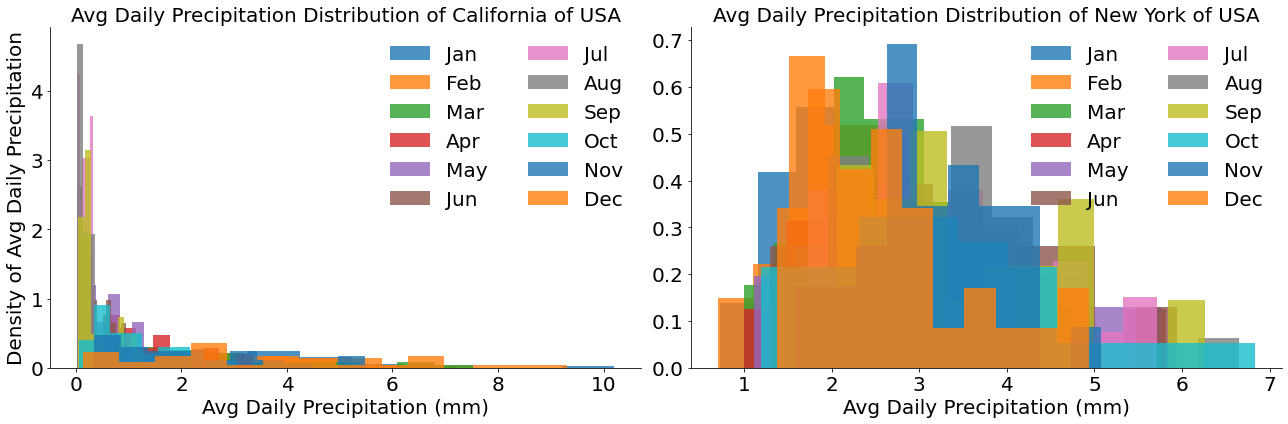

In [7]:
fontsize=20
plt.rcParams['xtick.labelsize']=fontsize
plt.rcParams['ytick.labelsize']=fontsize
plt.rcParams['axes.labelsize']=fontsize
plt.rcParams['axes.titlesize']=fontsize
plt.rcParams['legend.fontsize']=fontsize
plt.rcParams['legend.title_fontsize']=fontsize
plt.rcParams['axes.spines.right']=False
plt.rcParams['axes.spines.top']=False
plt.rcParams['figure.figsize']=(18, 6)

months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

fig,axs=plt.subplots(1,2)
for i,state in enumerate(['California','New York']):
    data=df.loc[df['State']==state]
    ax=axs[i]
    for j,month in enumerate(months):
        month_data=data.loc[data['Month']==j+1,'Avg Daily Precipitation (mm)']
        ax.hist(month_data,label=month,alpha=0.8,density=True)
        ax.legend(ncol=2)    
    if i==0:
        ax.set_ylabel('Density of Avg Daily Precipitation')

    ax.set_xlabel('Avg Daily Precipitation (mm)')
    ax.set_title('Avg Daily Precipitation Distribution of %s of USA' % (state))
plt.tight_layout()

Text(0.5, 1.0, 'Avg Daily Precipitation Distribution by Month of California and New York of USA')

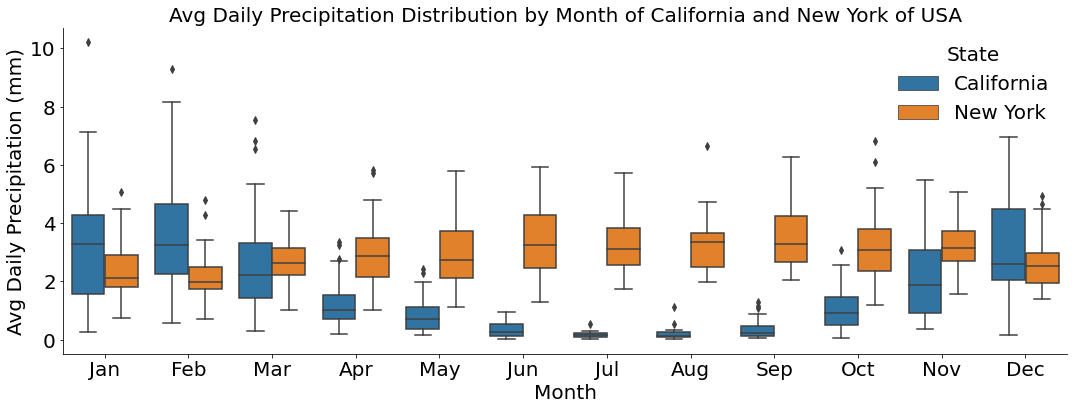

In [8]:
data=df
data=data.loc[(data['State']=='California')|(data['State']=='New York')]

months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

sns.boxplot(x='Month',y='Avg Daily Precipitation (mm)',hue='State',data=data)

plt.xticks(ticks=np.arange(0,12),labels=months)
plt.title('Avg Daily Precipitation Distribution by Month of California and New York of USA')

Text(0.5, 1.0, 'Avg Daily Precipitation Distribution by Month of California and New York')

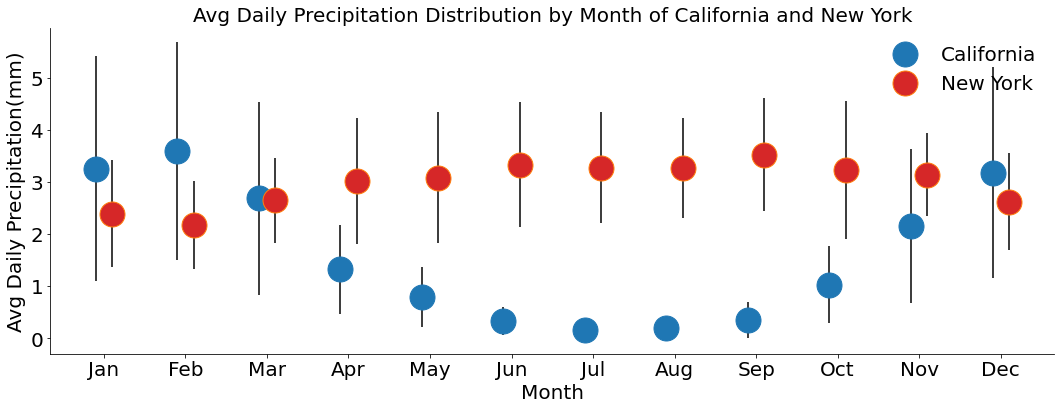

In [9]:
plt.rcParams['figure.figsize']=(18,6)

months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

x_offset=[-0.1,0.1]
colors=['tab:blue','tab:red']
for i,state in enumerate(['California', 'New York']):
    data=df.loc[df['State']==state]
    mean_data=data.groupby(['Month'],as_index=False).mean()
    std_data=data.groupby(['Month'],as_index=False).std()

    plt.errorbar(x=mean_data['Month']+x_offset[i],y=mean_data['Avg Daily Precipitation (mm)'],yerr=std_data['Avg Daily Precipitation (mm)'],
                 fmt='o',ecolor='k',markersize=25,label=state,markerfacecolor=colors[i])
plt.xticks(ticks=np.arange(1,13),labels=months)
plt.legend()
plt.xlabel('Month')
plt.ylabel('Avg Daily Precipitation(mm)')
plt.title('Avg Daily Precipitation Distribution by Month of California and New York')

Text(0.5, 1.0, 'Precipitation & Max Air Temperature Distribution')

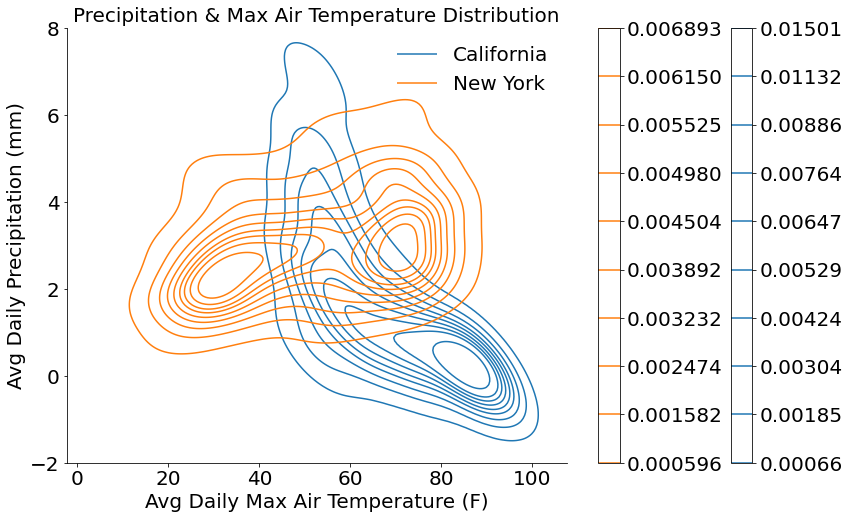

In [10]:
plt.rcParams['figure.figsize']=(14,8)

data=df
ax=plt.figure().add_subplot(111)

for state in ['California', 'New York']:
    sns.kdeplot(data=data.loc[data['State']==state,'Avg Daily Max Air Temperature (F)'], 
        data2=data.loc[data['State'] == state,'Avg Daily Precipitation (mm)'], 
        cbar=True,ax=ax,label=state)
plt.legend()
plt.ylim(-2,8)
plt.title('Precipitation & Max Air Temperature Distribution')

### precipitation vs temperature

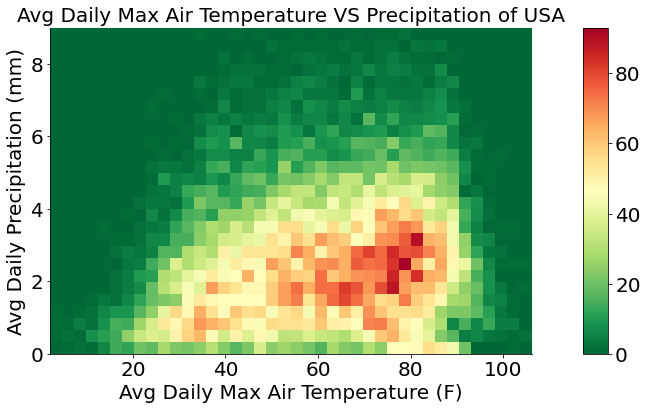

In [11]:
plt.rcParams['figure.figsize']=(10,6)

data=df
fig,(ax,cax)=plt.subplots(1,2,gridspec_kw={'width_ratios':[0.95,0.05]})
_,_,_,mappable=ax.hist2d(x='Avg Daily Max Air Temperature (F)',y='Avg Daily Precipitation (mm)',data=data,bins=40,cmap=plt.cm.RdYlGn_r)

ax.set_xlabel('Avg Daily Max Air Temperature (F)')
ax.set_ylabel('Avg Daily Precipitation (mm)')
ax.set_title('Avg Daily Max Air Temperature VS Precipitation of USA')
ax.set_ylim((0,9))
plt.colorbar(mappable=mappable,cax=cax,ax=ax)
plt.show()

Text(0.5, 1.0, 'Avg Daily Max Air Temperature VS Precipitation of USA')

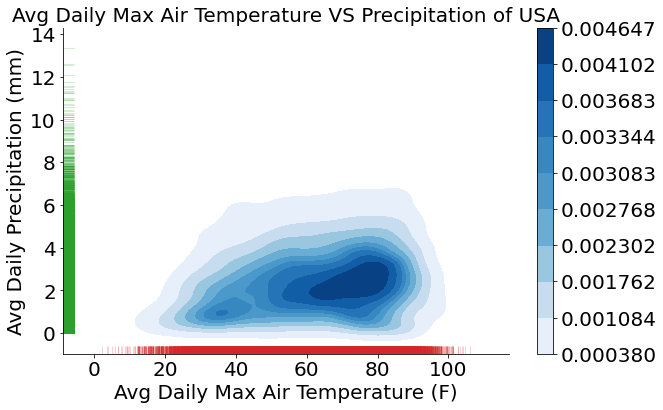

In [12]:
plt.rcParams['figure.figsize']=(10,6)

sns.kdeplot(
    data=data['Avg Daily Max Air Temperature (F)'],
    data2=data['Avg Daily Precipitation (mm)'],
    cbar=True,
    shade=True,
    cmap='Blues'
)
sns.rugplot(data['Avg Daily Max Air Temperature (F)'],
            axis='x', color='tab:red', alpha=0.2)
sns.rugplot(data['Avg Daily Precipitation (mm)'],
            axis='y', color='tab:green', alpha=0.2)

plt.title('Avg Daily Max Air Temperature VS Precipitation of USA')

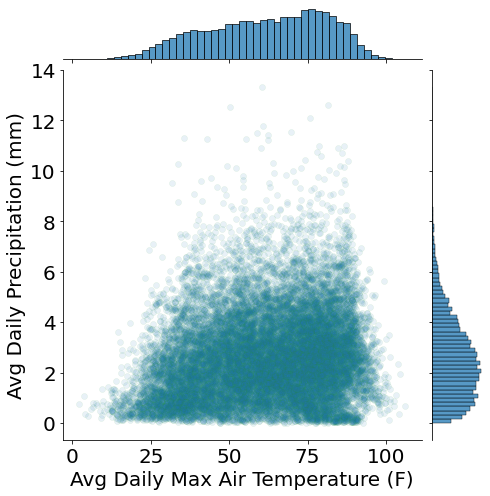

In [13]:
data = df

sns.jointplot(x='Avg Daily Max Air Temperature (F)', y='Avg Daily Precipitation (mm)', kind='scatter'
              , height=7
              , alpha=0.1, ec='tab:green', ratio=6
              , space=0.2
              , data=data)

Text(0.5, 1.0, 'Avg Daily Max Air Temperature Distribution by State and Year')

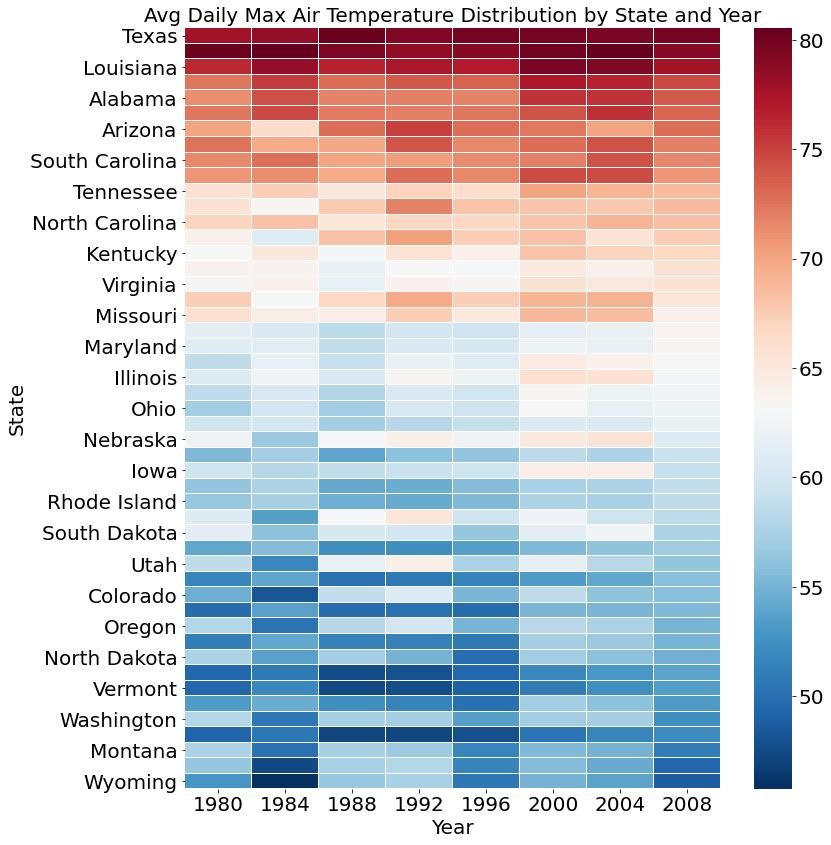

In [14]:
plt.rcParams['figure.figsize'] = (12,14)

years = np.arange(1980,2011,4)
data=pd.DataFrame([])

for year in years:
    data=pd.concat([data,df.loc[df['Year']==year]])

data=data.pivot_table(index='State',values='Avg Daily Max Air Temperature (F)',aggfunc='median',columns='Year').sort_values(years[-1],ascending=False)
sns.heatmap(data,cmap=plt.cm.RdBu_r,linewidths=0.01)
plt.title('Avg Daily Max Air Temperature Distribution by State and Year', fontsize=20)

Text(0.5, 1.0, 'Avg Daily Precipitation Distribution by State and Year')

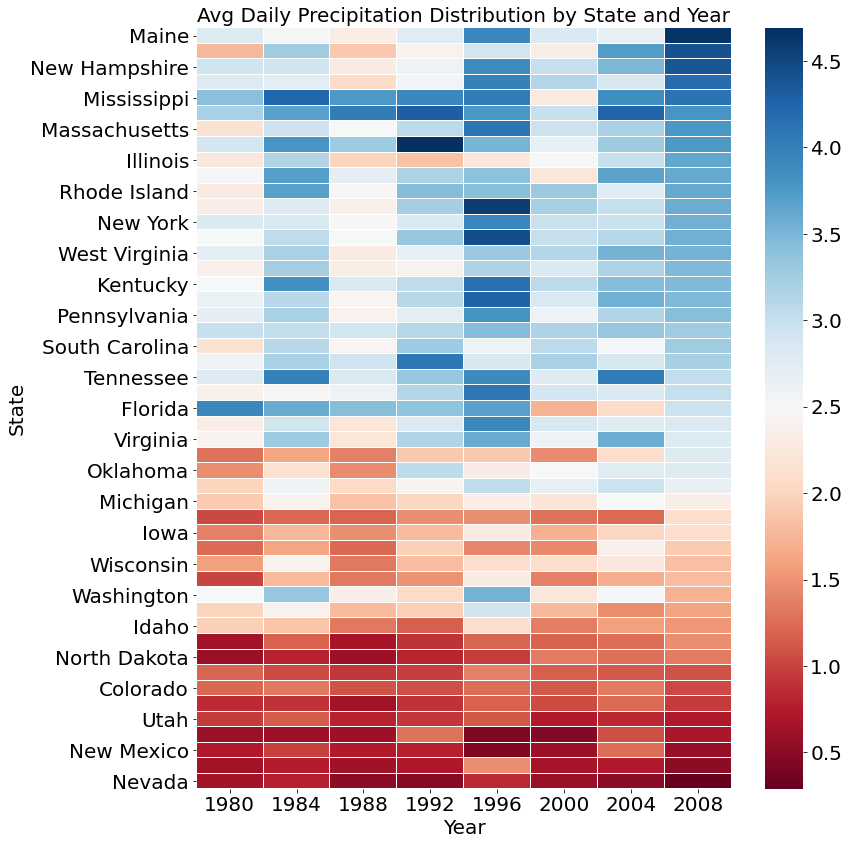

In [15]:
plt.rcParams['figure.figsize']=(12,14)

years=np.arange(1980,2011,4)
data=pd.DataFrame([])
for year in years:
    data=pd.concat([data,df.loc[df['Year']==year]])

data=data.pivot_table(index='State',values='Avg Daily Precipitation (mm)',aggfunc='median',columns='Year').sort_values(years[-1],ascending=False)
sns.heatmap(data,cmap=plt.cm.RdBu,linewidths=0.01)
plt.title('Avg Daily Precipitation Distribution by State and Year', fontsize=20)

### significance test

In [16]:
from scipy import stats

data=df
cols=['Avg Daily Sunlight (kJ/m2)',
        'Avg Daily Max Air Temperature (F)',
        'Avg Daily Precipitation (mm)']

for col in cols:
    t_test=stats.ttest_ind(data.loc[data['Year']==1980,col],
                           data.loc[data['Year']==2010,col])
    print(col,t_test)

Avg Daily Sunlight (kJ/m2) Ttest_indResult(statistic=-0.5503669277154255, pvalue=0.5821724266030209)
Avg Daily Max Air Temperature (F) Ttest_indResult(statistic=-1.2927000407469929, pvalue=0.19636917208459362)
Avg Daily Precipitation (mm) Ttest_indResult(statistic=-2.9310996901920627, pvalue=0.0034430593532715197)


#####  -> meaning no sigfinicant changes